In [218]:
import iris,sys,json
import matplotlib.pyplot as plt
import iris.plot as iplt
import pandas as pd
import numpy as np
import metpy.calc
from metpy.units import units
sys.path.append("/Users/jago/Downloads/iris-grib-0.15.1")

Need to install:
- brew install eccodes (dependance for https://pypi.org/project/eccodes/, also takes forever)
- pip install eecodes iris iris_grib

God damn meteorolgists just have to make this hard for us

In [46]:
file="data/wind/forcast/gfs/gfs.t00z.pgrb2.0p25all.anl"

In [47]:
data=iris.load(file)

In [229]:
data[0].as_pandas()

KeyError: 0

<iris 'Cube' of y_wind / (m s-1) (latitude: 5; longitude: 5)>

In [54]:
x=[]
y=[]
geo=[]
for n in range(0,31):
    x.append(data[8][n][0][0].data)
    y.append(data[19][n][0][0].data)
    geo.append(data[0][n][0][0].data)

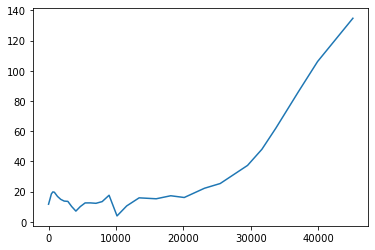

In [223]:
plt.plot(geo,np.sqrt(np.array(x)**2+np.array(y)**2))

In [199]:
data=pd.DataFrame(data={"alt":10*alts,"speed":np.sqrt(np.array(x)**2+np.array(y)**2)})

In [202]:
np.sqrt(np.array(x)**2+np.array(y)**2)[13]

3.8276319705998407

In [227]:
alts=metpy.calc.geopotential_to_height(geo*units.m**2/units.s**2)

In [161]:
pres=[100,200,300,500,700,1000,2000,3000,5000,7000,10000,15000,20000,25000,30000,35000,40000,45000,50000,55000,60000,65000,70000,75000,80000,85000,90000,92500,95000,97500,100000]

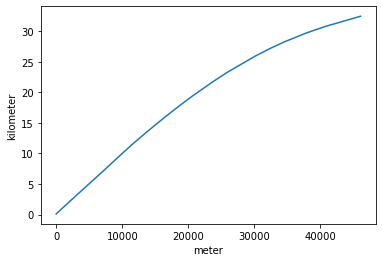

In [196]:
plt.plot(alts*10,metpy.calc.pressure_to_height_std(pres*units.kg/(units.meter*units.second*units.second)))

In [177]:
metpy.calc.pressure_to_height_std(pres*units.kg/(units.meter*units.second*units.second))

Magnitude,[32.4338315751554 30.759920451561545 29.67338596021319 28.179617571490553 27.113340945952235 25.90597091930237 23.31179815450863 21.62792250201085 19.31292906160984 17.66044838762466 15.789305770782056 13.502124458680512 11.768941583734335 10.357705969899126 9.159326117633348 8.113167953958643 7.181808720079468 6.3404188769744865 5.571624925427431 4.862764195619978 4.204304118725353 3.5888773302735 3.01066437120362 2.4649832047832607 1.9480072707947984 1.456566413934906 0.9880029475828537 0.7615831122910421 0.5400654068371115 0.3232187858556252 0.11082868265382036]
Units,kilometer


In [173]:
help(units)

Help on UnitRegistry in module pint.registry object:

class UnitRegistry(SystemRegistry, ContextRegistry, NonMultiplicativeRegistry)
 |  UnitRegistry(*args, **kwargs)
 |  
 |  The unit registry stores the definitions and relationships between units.
 |  
 |  Parameters
 |  ----------
 |  filename :
 |      path of the units definition file to load or line-iterable object.
 |      Empty to load the default definition file.
 |      None to leave the UnitRegistry empty.
 |  force_ndarray : bool
 |      convert any input, scalar or not to a numpy.ndarray.
 |  force_ndarray_like : bool
 |      convert all inputs other than duck arrays to a numpy.ndarray.
 |  default_as_delta :
 |      In the context of a multiplication of units, interpret
 |      non-multiplicative units as their *delta* counterparts.
 |  autoconvert_offset_to_baseunit :
 |      If True converts offset units in quantites are
 |      converted to their base units in multiplicative
 |      context. If False no conversion happ

In [209]:
data2=iris.load("data/wind/forcast/gfs/small.grb2")

In [211]:
data2

[<iris 'Cube' of x_wind / (m s-1) (latitude: 5; longitude: 5)>,
<iris 'Cube' of x_wind / (m s-1) (latitude: 5; longitude: 5)>,
<iris 'Cube' of x_wind / (m s-1) (latitude: 5; longitude: 5)>,
<iris 'Cube' of y_wind / (m s-1) (latitude: 5; longitude: 5)>,
<iris 'Cube' of y_wind / (m s-1) (latitude: 5; longitude: 5)>,
<iris 'Cube' of y_wind / (m s-1) (latitude: 5; longitude: 5)>]

data2[0][1]

In [220]:
data3 = json.load(open('data/wind/forcast/gfs/a.json'))

df = pd.DataFrame(data)

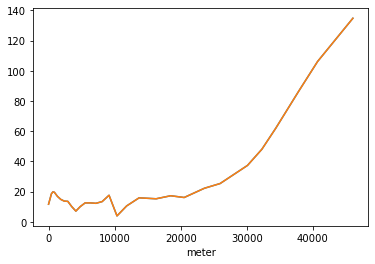

In [228]:
plt.plot(df["alt"],df.speed)
plt.plot(alts*10,np.sqrt(np.array(x)**2+np.array(y)**2))